### **Medical Cost Prediction Using Machine Learning Algorithms**

#### Objective:

Develop a predictive model to estimate medical costs billed by health insurance.

#### Approach:

1. **Perform basic exploratory data analysis (EDA) to understand the dataset.**
2. **Identify input and output variables, ML task, and evaluation metric.**
3. **Split the dataset into training and testing sets.**
4. **Prepare the data by standardizing/normalizing numerical variables and encoding categorical variables.**
5. **Train separate models using various machine learning algorithms.**
6. **Evaluate each model's performance using the Mean Absolute Error metric.**
7. **Display results and conclude the most effective algorithm for medical cost prediction.**


#### Step - 1: Load the data and perform the basic EDA to understand the data.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("insurance.csv")  
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
print("\nDataset info:")
df.info()


Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
print("\nSummary Statistics:")
df.describe()


Summary Statistics:


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
print("\nMissing Values:")
df.isnull().sum() # Finding NUll Values


Missing Values:


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
print("\nUnique Values in Categorical Columns:")
unique_values = df.select_dtypes(include="object").apply(lambda x: x.value_counts().index.tolist())
pd.DataFrame(unique_values)


Unique Values in Categorical Columns:


,0
sex,"[male, female]"
smoker,"[no, yes]"
region,"[southeast, southwest, northwest, northeast]"


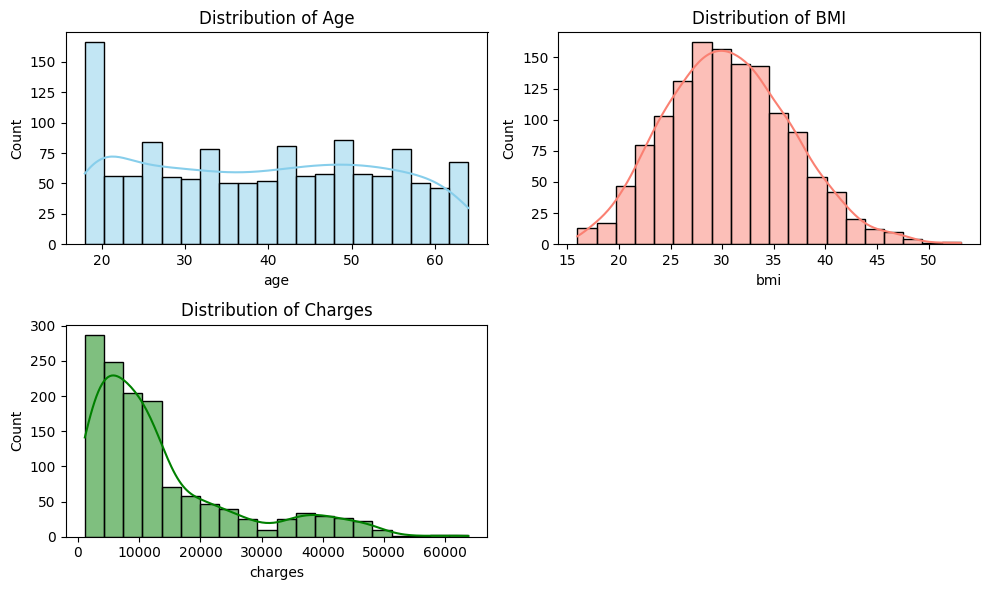

In [10]:
plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1) # age column
sns.histplot(data=df, x="age", bins=20, kde=True, color="skyblue")
plt.title("Distribution of Age")

plt.subplot(2, 2, 2) # bmi column
sns.histplot(data=df, x="bmi", bins=20, kde=True, color="salmon")
plt.title("Distribution of BMI")

plt.subplot(2, 2, 3) # charges column
sns.histplot(data=df, x="charges", bins=20, kde=True, color="green")
plt.title("Distribution of Charges")

plt.tight_layout()
plt.show()

#### Step - 2: Document the below mentioned points properly: 

- Identify the input and output/target variables. 
- Identify the type of ML Task.
- Identify the Evaluation Metric.
	- For regression task - Mean Absolute Error
	- For classification task - Accuracy


In [11]:
input_variables = df.columns[:-1]  
output_variable = df.columns[-1]
print("Input variables (features):", input_variables)
print("Output variable (target):", output_variable)

ml_task = "Regression"
print("Type of ML Task:", ml_task)


evaluation_metric = "Mean Absolute Error" 
print("Evaluation Metric:", evaluation_metric)

Input variables (features): Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region'], dtype='object')
Output variable (target): charges
Type of ML Task: Regression
Evaluation Metric: Mean Absolute Error


#### Step - 3: Split the dataset into Training and Testing (recommended 75:25 split).

In [12]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['charges'])  
y = df['charges']               

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (1003, 6)
Shape of X_test: (335, 6)
Shape of y_train: (1003,)
Shape of y_test: (335,)


#### Step - 4: Data preparation on train data:
- For Numerical Variables - Standardization or Normalization (Fit and Transform)
- For Categorical - LabelEncoding or OneHotEncoding (Choose wisely)

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Preparation on train data
scaler = StandardScaler()
encoder = OneHotEncoder()

numerical_columns = ['age', 'bmi', 'children']
categorical_columns = ['sex', 'smoker', 'region']

# Standardization for numerical variables
X_train_numerical_scaled = scaler.fit_transform(X_train[numerical_columns])

# OneHotEncoding for categorical variables
X_train_categorical_encoded = encoder.fit_transform(X_train[categorical_columns])

# Concatenating numerical and categorical features
X_train_final = np.concatenate((X_train_numerical_scaled, X_train_categorical_encoded.toarray()), axis=1)
X_train_final

array([[-1.08716652, -1.14087456, -0.91749963, ...,  1.        ,
         0.        ,  0.        ],
       [-0.80210593, -0.66584152,  0.7436053 , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.83699246,  1.52879447, -0.08694717, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.33584849, -0.8879673 , -0.91749963, ...,  0.        ,
         0.        ,  0.        ],
       [-0.1607196 ,  2.84324666,  0.7436053 , ...,  0.        ,
         0.        ,  1.        ],
       [ 1.12205304, -0.10179179, -0.91749963, ...,  0.        ,
         0.        ,  1.        ]])

#### Step - 5: Data preparation on test data:
- For Numerical Variables - Standardization (Transform)
- For Categorical - LabelEncoding or OneHotEncoding (Choose wisely)


In [15]:
# Standardization for numerical variables
X_test_numerical_scaled = scaler.transform(X_test[numerical_columns])

# OneHotEncoding for categorical variables
X_test_categorical_encoded = encoder.transform(X_test[categorical_columns])

# Concatenating numerical and categorical features
X_test_final = np.concatenate((X_test_numerical_scaled, X_test_categorical_encoded.toarray()), axis=1)

#### Step - 6: Model Training Phase - Use all the algorithms mentioned below to train separate models:
- KNN
- Logistic Regression / Linear Regression
- Support Vector Machines
- Decision Trees
- Random Forest


In [16]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

knn_model = KNeighborsRegressor()
knn_model.fit(X_train_final, y_train)

linear_model = LinearRegression()
linear_model.fit(X_train_final, y_train)

svm_model = SVR()
svm_model.fit(X_train_final, y_train)

dt_model = DecisionTreeRegressor()
dt_model.fit(X_train_final, y_train)

rf_model = RandomForestRegressor()
rf_model.fit(X_train_final, y_train)

RandomForestRegressor()

#### Step - 7: Predict and evaluate each model separately using the correct evaluation metric. 


In [17]:
from sklearn.metrics import mean_absolute_error

# Predictions
knn_predictions = knn_model.predict(X_test_final)
knn_mae = mean_absolute_error(y_test, knn_predictions)

linear_predictions = linear_model.predict(X_test_final)
linear_mae = mean_absolute_error(y_test, linear_predictions)


svm_predictions = svm_model.predict(X_test_final)
svm_mae = mean_absolute_error(y_test, svm_predictions)

dt_predictions = dt_model.predict(X_test_final)
dt_mae = mean_absolute_error(y_test, dt_predictions)

rf_predictions = rf_model.predict(X_test_final)
rf_mae = mean_absolute_error(y_test, rf_predictions)


print("KNN Mean Absolute Error:", knn_mae)
print("Linear Regression Mean Absolute Error:", linear_mae)
print("SVM Mean Absolute Error:", svm_mae)
print("Decision Trees Mean Absolute Error:", dt_mae)
print("Random Forest Mean Absolute Error:", rf_mae)


KNN Mean Absolute Error: 3532.650868582089
Linear Regression Mean Absolute Error: 4243.654116653143
SVM Mean Absolute Error: 8478.45676207452
Decision Trees Mean Absolute Error: 2817.276648564179
Random Forest Mean Absolute Error: 2575.895340811585


#### Step - 8: Display a plot which shows all the algorithms applied along with the scores achieved. Write your conclusion on the best algorithm for the Medical Cost Prediction problem.

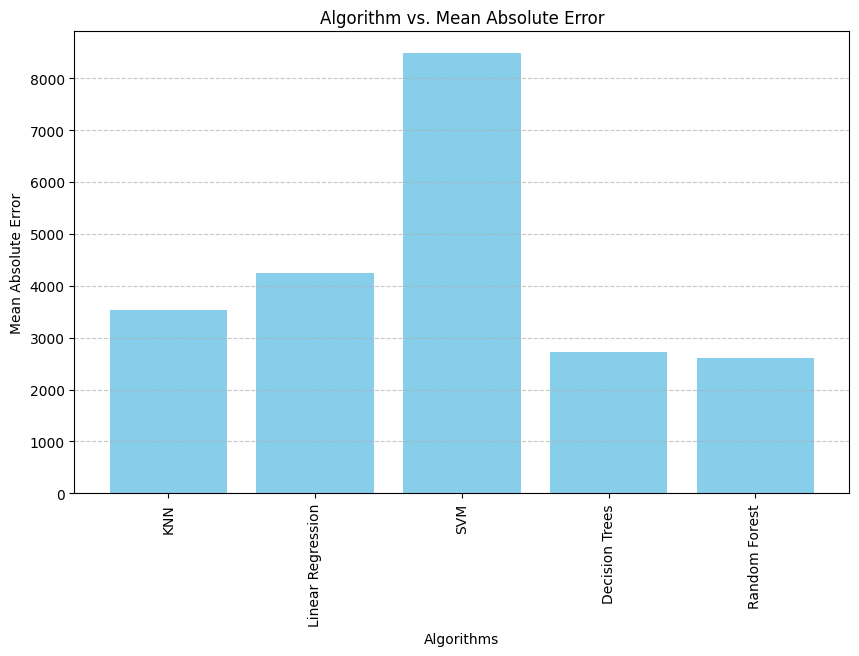

Conclusion: The best algorithm for the Medical Cost Prediction problem is Random Forest


In [25]:
algorithms = ['KNN', 'Linear Regression', 'SVM', 'Decision Trees', 'Random Forest']
mae_scores = [knn_mae, linear_mae, svm_mae, dt_mae, rf_mae]

plt.figure(figsize=(10, 6))
plt.bar(algorithms, mae_scores, color='skyblue')
plt.xlabel('Algorithms')
plt.ylabel('Mean Absolute Error')
plt.title('Algorithm vs. Mean Absolute Error')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Conclusion
best_algorithm = algorithms[mae_scores.index(min(mae_scores))]
print("Conclusion: The best algorithm for the Medical Cost Prediction problem is", best_algorithm)
